1. Performing anlysis for the Apple stock exchange dataset from 2020-2024

In [2]:
import os, sys
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\Users\ibsan\Desktop\TenX\week-1\notebooks
c:\Users\ibsan\Desktop\TenX\week-1


In [2]:
# 2 Quantitative analysis using pynance and TaLib
import talib
import pandas as pd 
import matplotlib.pyplot as plt 
from scripts.Data_Loader import Data_Loader
from scripts.finintial_analyzer import calculate_technical_indicator



In [3]:
# Paths to the data set
AAPL_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\AAPL_historical_data.csv"
AMZN_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\AMZN_historical_data.csv"
GOOG_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\GOOG_historical_data.csv"
META_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\META_historical_data.csv"
MSFT_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\MSFT_historical_data.csv"
NVDA_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\NVDA_historical_data.csv"
TSLA_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\TSLA_historical_data.csv"


In [4]:
AAPL_DF = Data_Loader(AAPL_PATH)
print(AAPL_DF.head(10))

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
5 1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   
6 1980-12-22  0.132254  0.132813  0.132254  0.132254   0.101954   37363200   
7 1980-12-23  0.137835  0.138393  0.137835  0.137835   0.106257   46950400   
8 1980-12-24  0.145089  0.145647  0.145089  0.145089   0.111849   48003200   
9 1980-12-26  0.158482  0.159040  0.158482  0.158482   0.122173   55574400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.

Simple EDA and Data Manuplation

In [5]:
# Making sure if all the necessary columns are present
print(AAPL_DF.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [6]:
print("\nBasic Information about the Dataset")
print(AAPL_DF.info())


Basic Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB
None


In [7]:
# First ensuring the date is in datetime format
AAPL_DF['Date'] = pd.to_datetime(AAPL_DF['Date'])

# Now filter the data for the date range between 2020-01-01 and 2024-01-01 
# for analysis simplicity

start_date = '2020-01-01'
end_date = '2024-01-01'

AAPL_DF = AAPL_DF[(AAPL_DF['Date'] >= start_date) & (AAPL_DF['Date'] <= end_date)]

# Then sorting the dataframe by Date
AAPL_DF = AAPL_DF.sort_values('Date')


# Then displaying the head of the dataframe
print(AAPL_DF.head())

           Date       Open       High        Low      Close  Adj Close  \
9847 2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876099   
9848 2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167595   
9849 2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661   
9850 2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536   
9851 2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208   

         Volume  Dividends  Stock Splits  
9847  135480400        0.0           0.0  
9848  146322800        0.0           0.0  
9849  118387200        0.0           0.0  
9850  108872000        0.0           0.0  
9851  132079200        0.0           0.0  


In [10]:
print("\nSummary Statistics")
print(AAPL_DF.iloc[:,1:].describe())


Summary Statistics
              Open         High          Low        Close    Adj Close  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    140.675507   142.321389   139.143536   140.808131   138.864226   
std      33.310018    33.430571    33.179199    33.313857    33.576954   
min      57.020000    57.125000    53.152500    56.092499    54.569725   
25%     123.682503   125.030003   122.157499   123.592501   121.187904   
50%     145.540001   147.264999   144.120003   145.860001   143.754517   
75%     166.302498   168.147503   164.815002   166.214996   164.267063   
max     198.020004   199.619995   197.000000   198.110001   197.361084   

             Volume    Dividends  Stock Splits  
count  1.006000e+03  1006.000000   1006.000000  
mean   9.895211e+07     0.003511      0.003976  
std    5.439653e+07     0.027693      0.126113  
min    2.404830e+07     0.000000      0.000000  
25%    6.407675e+07     0.000000      0.000000  
50%    8.467540e+07

In [12]:
print("\nSum of na in the Data-Frame")
print(AAPL_DF.isna().sum())
print("\nSum of null in the Data-Fram")
print(AAPL_DF.isnull().sum())



Sum of na in the Data-Frame
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Sum of null in the Data-Fram
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


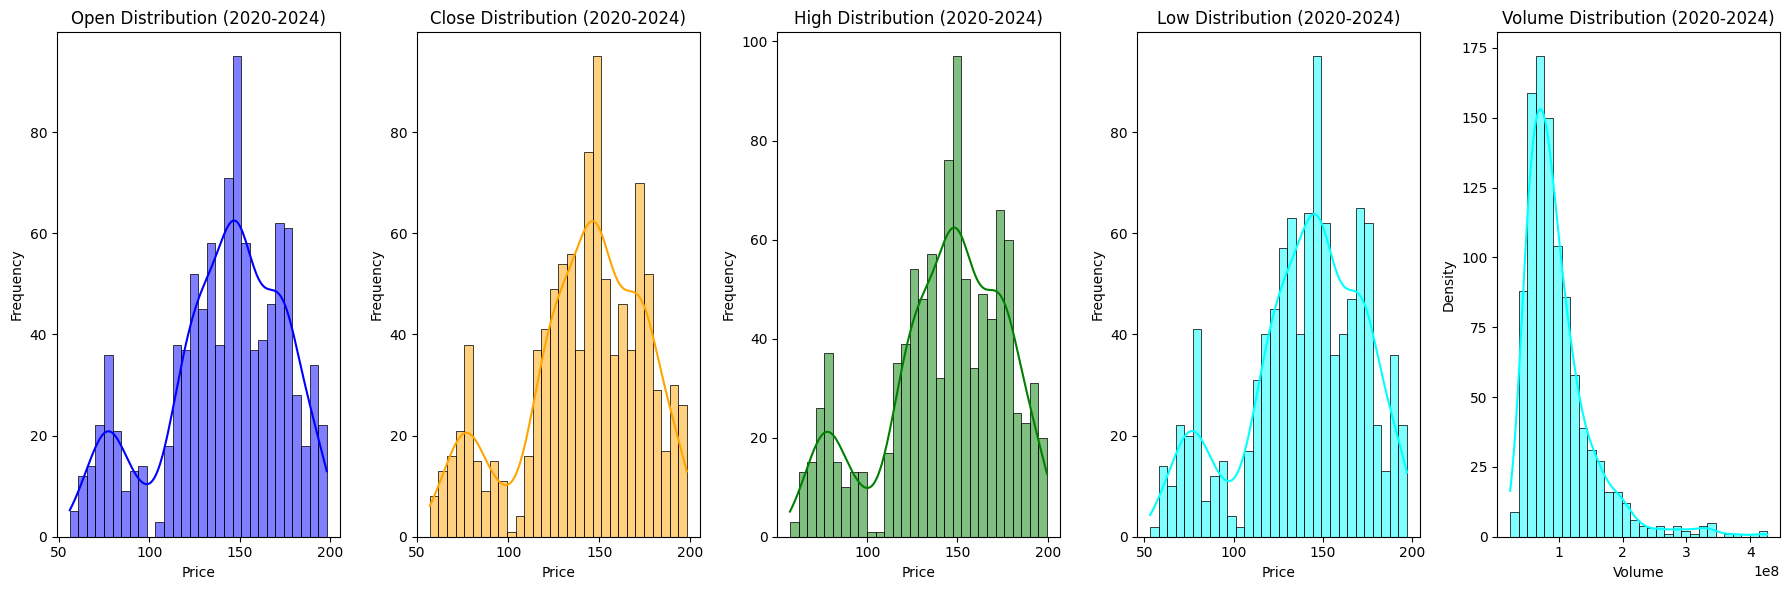

In [13]:
import seaborn as sns
columns_to_plot = ['Close', 'Open', 'High', 'Low', 'Volume']

# Create a figure with 3 subplots (1 row, 5columns)
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

# Plot the histogram for each column on different subplots
sns.histplot(AAPL_DF['Open'], ax=axes[1], color='orange', kde=True, bins=30)
axes[0].set_title('Open Distribution (2020-2024)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(AAPL_DF['Close'], ax=axes[0], color='blue', kde=True, bins=30)
axes[1].set_title('Close Distribution (2020-2024)')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

sns.histplot(AAPL_DF['High'], ax=axes[2], color='green', kde=True, bins=30)
axes[2].set_title('High Distribution (2020-2024)')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

sns.histplot(AAPL_DF['Low'], ax=axes[3], color='cyan', kde=True, bins=30)
axes[3].set_title('Low Distribution (2020-2024)')
axes[3].set_xlabel('Price')
axes[3].set_ylabel('Frequency')

sns.histplot(AAPL_DF['Volume'], ax=axes[4], color='cyan', kde=True, bins=30)
axes[4].set_title('Volume Distribution (2020-2024)')
axes[4].set_xlabel('Volume')
axes[4].set_ylabel('Density')

plt.tight_layout()
plt.show()

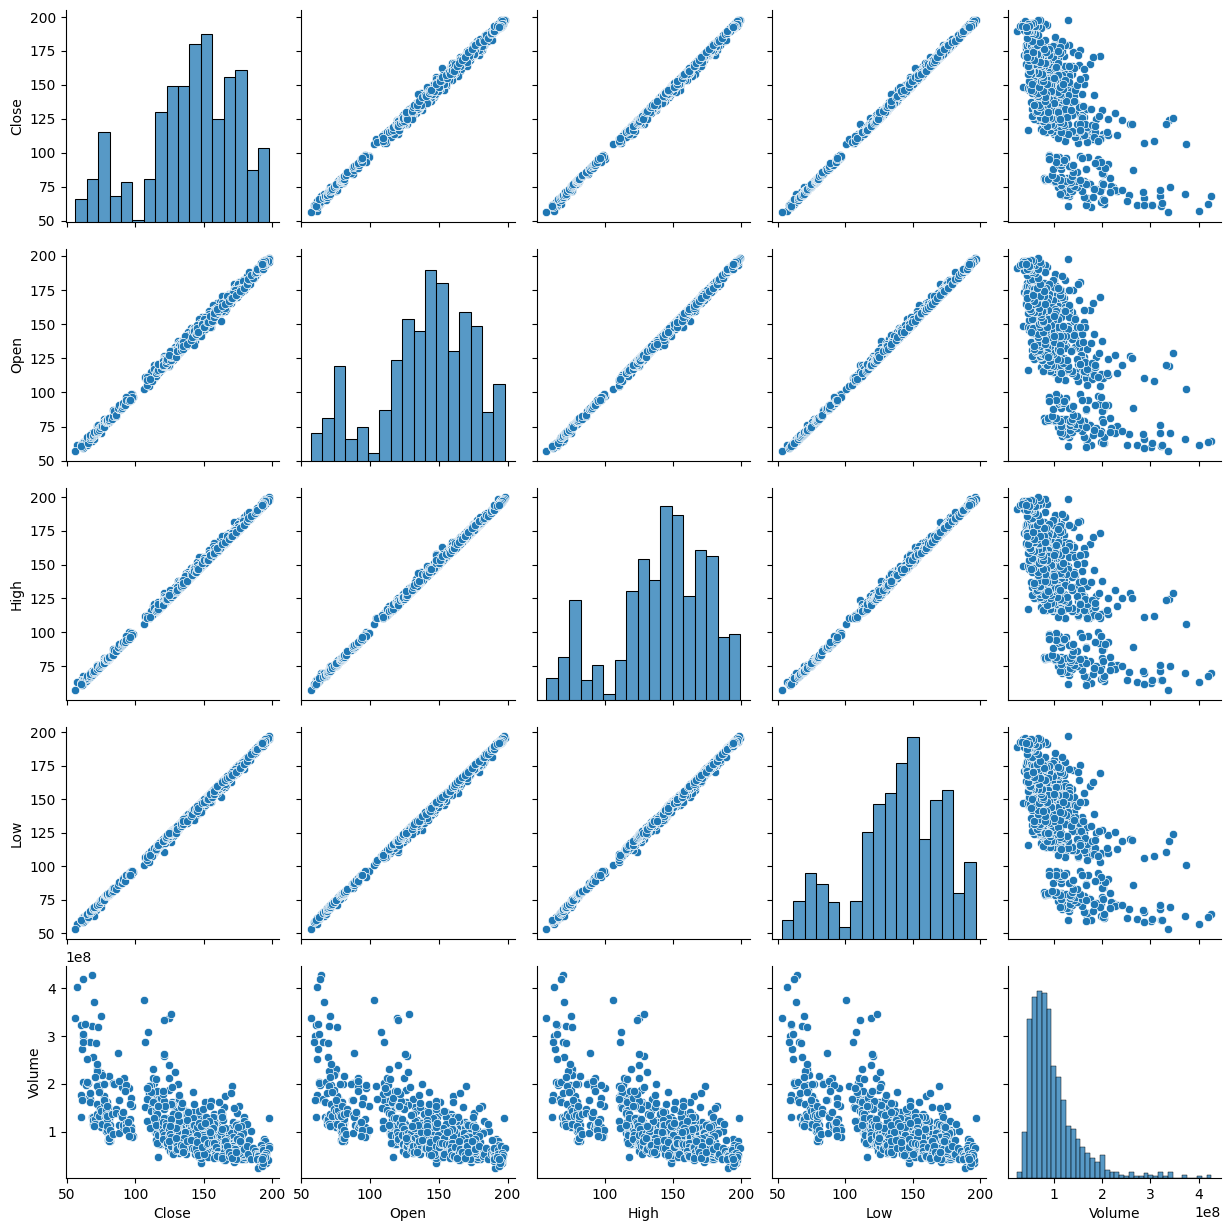

In [14]:
# Using a pair plot
columns_to_plot = ['Close', 'Open', 'High', 'Low', 'Volume']

# Create a pairplot for the selected columns
sns.pairplot(AAPL_DF[columns_to_plot])
plt.show()

1.1 Time Series Analysis

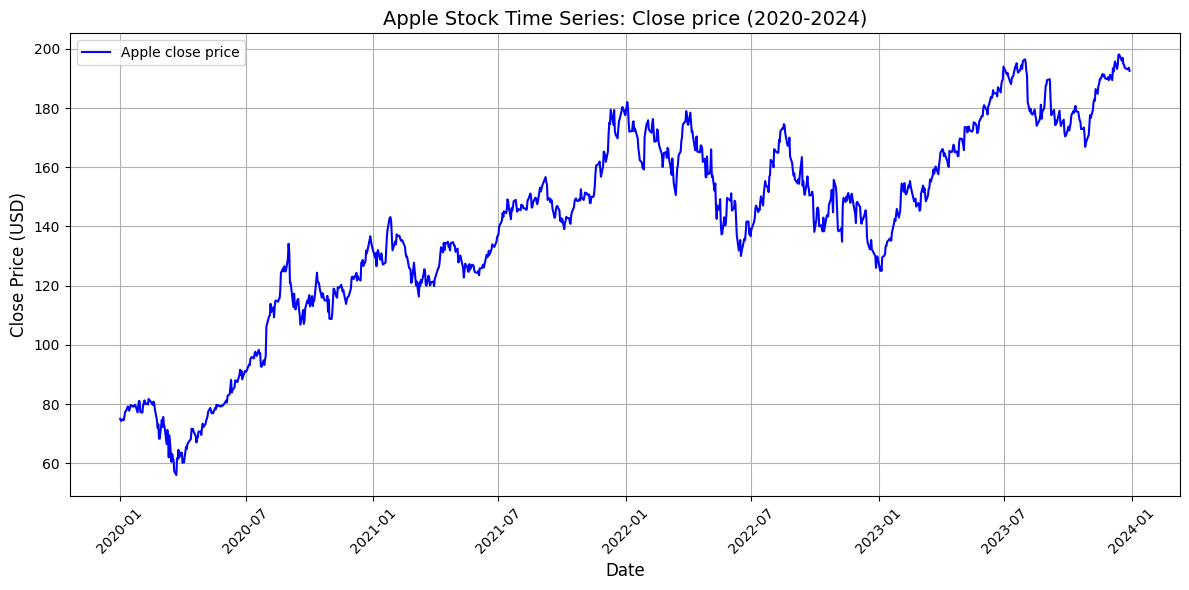

In [15]:
# Plotting the time-series plot for the closing price of the Apple stock dataset

plt.figure(figsize=(12,6))
plt.plot(AAPL_DF['Date'] , AAPL_DF['Close'], label='Apple close price', color='blue')
plt.title('Apple Stock Time Series: Close price (2020-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

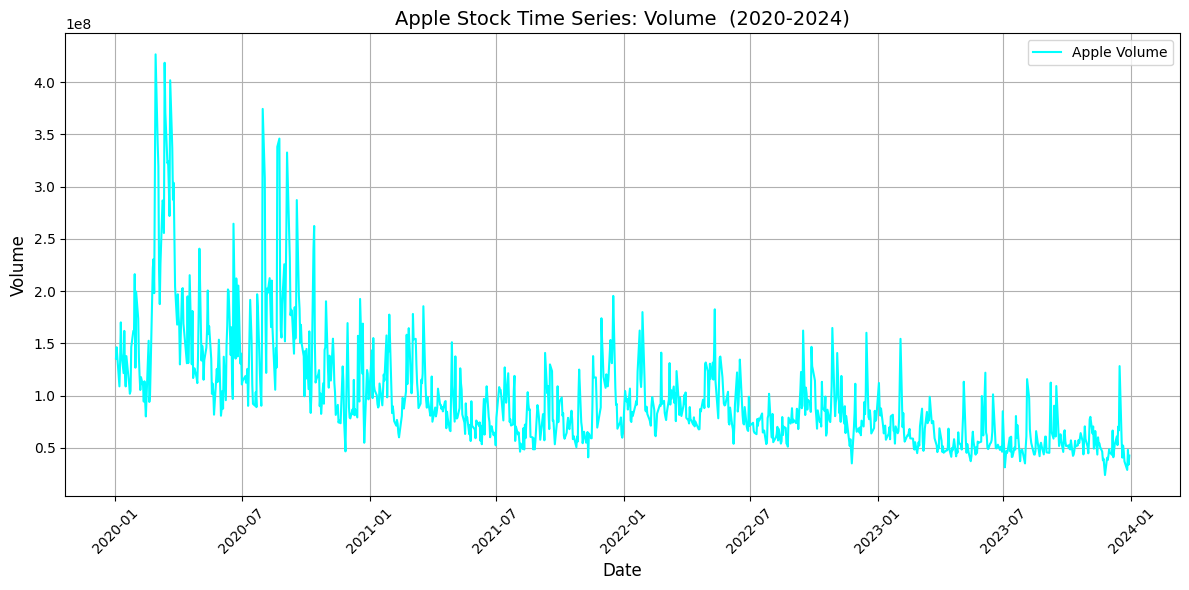

In [16]:
# Plotting the time-series plot for the Volume of the Apple stock dataset

plt.figure(figsize=(12,6))
plt.plot(AAPL_DF['Date'] , AAPL_DF['Volume'], label='Apple Volume', color='cyan')
plt.title('Apple Stock Time Series: Volume  (2020-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Then Calculating the Moving Average, relative strength index and 
# Calculating Moving Average Convergence Divergence for the AAPL_DF dataset
import talib

# Calculating simple moving average 
sma = talib.SMA(AAPL_DF['Close'], timeperiod=20)
# then merging into the data frame
AAPL_DF['SMA'] = sma

# Calculating relative strength index 
rsi = talib.RSI(AAPL_DF['Close'], timeperiod=14)
AAPL_DF['RSI'] = rsi

# Calculating Moving Average Convergence Divergence

macd, macdsignal, macdhist = talib.MACD(AAPL_DF['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
AAPL_DF['MACD'] = macd
AAPL_DF['MACD_Signal'] = macdsignal
AAPL_DF['MACD_Histogram'] = macdhist

print(AAPL_DF.head(10))

           Date       Open       High        Low      Close  Adj Close  \
9847 2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876099   
9848 2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167595   
9849 2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661   
9850 2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536   
9851 2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208   
9852 2020-01-09  76.809998  77.607498  76.550003  77.407501  75.127769   
9853 2020-01-10  77.650002  78.167503  77.062500  77.582497  75.297638   
9854 2020-01-13  77.910004  79.267502  77.787498  79.239998  76.906311   
9855 2020-01-14  79.175003  79.392502  78.042503  78.169998  75.867821   
9856 2020-01-15  77.962502  78.875000  77.387497  77.834999  75.542694   

         Volume  Dividends  Stock Splits        SMA  RSI  MACD  MACD_Signal  \
9847  135480400        0.0           0.0        NaN  NaN   NaN          NaN   
9848  146322800        0.0 

2. Performing anlysis for the Amazon stock exchange dataset from 2020-2024
***!!!!!!!!!!!!!!!! NOTICE   !!!!!!!!!!!!!***
*** The analysis from this to end will be performed by modularization techniques*****

In [1]:
###############################################################################
###############################################################################
import os, sys
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\Users\ibsan\Desktop\TenX\week-1\notebooks
c:\Users\ibsan\Desktop\TenX\week-1


In [2]:
from scripts.finintial_analyzer import FinancialAnalyzer

In [3]:
AMZN_PATH = "C:\\Users\\ibsan\\Desktop\\TenX\\week-1\\Data\\yfinance_data\\AMZN_historical_data.csv"
start_date = '2020-01-01'
end_date = '2024-01-01'

# Create an instance of FinancialAnalyzer
analyzer = FinancialAnalyzer(AMZN_PATH, start_date, end_date)

# Retrieve data
AMZN_df = analyzer.retrieve_data()
print(AMZN_df.head())

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497  80580000   
1 2020-01-03  93.224998  94.309998  93.224998  93.748497  93.748497  75288000   
2 2020-01-06  93.000000  95.184502  93.000000  95.143997  95.143997  81236000   
3 2020-01-07  95.224998  95.694504  94.601997  95.343002  95.343002  80898000   
4 2020-01-08  94.902000  95.550003  94.321999  94.598503  94.598503  70160000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [4]:
technical_indicator = analyzer.calculate_technical_indicator()
technical_indicator.head(100)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal,MACD_Hist
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-05-19,121.491501,124.250000,121.448502,122.466499,122.466499,86410000,0.0,0.0,118.840876,63.046669,117.669947,3.254882,3.593715,-0.338834
96,2020-05-20,123.893501,125.000504,123.363503,124.897003,124.897003,79962000,0.0,0.0,119.177001,66.315713,118.358238,3.450092,3.564991,-0.114898
97,2020-05-21,125.000000,126.272499,122.126999,122.336998,122.336998,102288000,0.0,0.0,119.295226,60.268101,118.737168,3.359501,3.523893,-0.164392
98,2020-05-22,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,119.361876,59.149422,119.033057,3.210913,3.461297,-0.250384


In [5]:
analyzer.plot_stock_data(technical_indicator)

In [6]:
analyzer.plot_rsi(technical_indicator)

In [7]:
analyzer.plot_ema(technical_indicator)

In [8]:
analyzer.plot_macd(technical_indicator)

*** Using PyNance for Financial Metrics ***
